Projet 6: Prédiction du Prix de l'Immobilier 
Contexte 
La prédiction des prix de l'immobilier est essentielle pour les agents 
immobiliers et les acheteurs potentiels afin de prendre des décisions 
informées. 
Problème 
Vous devez développer un modèle pour prédire les prix de l'immobilier et 
déployer une application qui permet aux utilisateurs de soumettre des 
caractéristiques de propriétés pour obtenir une estimation du prix. 
Dataset 
Lien: house prices data 
Instructions 
1. Importer et explorer le dataset. 
2. Prétraiter les données (gestion des valeurs manquantes, encodage des 
variables catégorielles). 
3. Entraîner un modèle de prédiction des prix (par exemple, une régression 
linéaire, XGBoost). 
4. Évaluer la performance du modèle. 
5. Créer une application web pour permettre la prédiction des prix de 
l'immobilier. 
6. Déployer l'application

In [120]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 762.0 kB/s eta 0:01:34
   ---------------------------------------- 0.8/72.0 MB 1.0 MB/s eta 0:01:11
    --------------------------------------- 1.6/72.0 MB 1.7 MB/s eta 0:00:42
   - -------------------------------------- 2.6/72.0 MB 2.5 MB/s eta 0:00:29
   - -------------------------------------- 2.9/72.0 MB 2.3 MB/s eta 0:00:30
   - -------------------------------------- 2.9/72.0 MB 2.3 MB/s eta 0:00:30
   - -------------------------------------- 2.9/72.0 MB 2.3 MB/s eta 0:00:30
   -- ------------------------------------- 3.9/72.0 MB 2.0 MB/s eta 0:00:34
   -- --------------------------

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import xgboost as xgb


from sklearn.linear_model import LinearRegression #Permet de créer des modéles de régression
from sklearn.metrics import mean_absolute_error,mean_squared_error #Pour mesurer la qualité de la prédiction(MAE,MSE,RMSE)
from sklearn.model_selection import train_test_split #Pour diviser les données ensemble d'entraitement et de test

In [78]:
#df = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')


In [79]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 2.Nettoyager et compréhension des donnée

In [80]:
# detail des df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

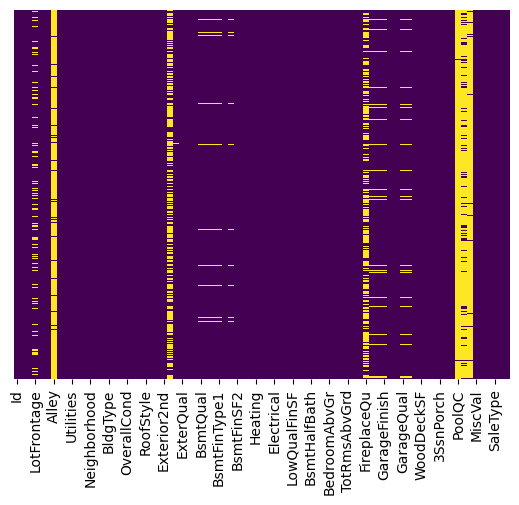

In [82]:
#Regarder les données manquantes
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [83]:
#Statistiques descriptivees

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [84]:

#Remplace les valeurs manquantes par le model
colonnes=["LotFrontage","MSZoning","SaleType"]

for col in colonnes:
    mode=df[col].mode()[0]
    df[col].fillna(mode,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7876\912436187.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode,inplace=True)


In [85]:
# Remplacement des NaN numériques par la médiane
# (La médiane est plus robuste que la moyenne)

for col in ('LotFrontage', 'GarageYrBlt', 'MasVnrArea'):
    if df[col].dtype != 'object': # S'assurer que la colonne est numérique
        median_value = df[col].median()
        df.loc[:, col] = df[col].fillna(median_value)

In [86]:
df["SalePrice"].fillna(df["SalePrice"].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7876\192130180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SalePrice"].fillna(df["SalePrice"].median(),inplace=True)


In [88]:
#Détecter les valeurs abérrante
def abérrante(df,colonne):
    Q1=df[colonne].quantile(0.25)
    Q3=df[colonne].quantile(0.75)
    IQR=Q3-Q1
    born_inf=Q1-1.5*IQR
    born_sup=Q3+1.5*IQR
    outliers=df[(df[colonne]<born_inf) | (df[colonne]>born_sup)]
    return outliers
variables =["Id","MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1",
            "GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]

for col in variables:
    outliers=abérrante(df,col)
    print(f"{col} - Nombre de valeurs aberrantes : {len(outliers)}")

Id - Nombre de valeurs aberrantes : 0
MSSubClass - Nombre de valeurs aberrantes : 103
LotFrontage - Nombre de valeurs aberrantes : 106
LotArea - Nombre de valeurs aberrantes : 69
OverallQual - Nombre de valeurs aberrantes : 2
OverallCond - Nombre de valeurs aberrantes : 125
YearBuilt - Nombre de valeurs aberrantes : 7
YearRemodAdd - Nombre de valeurs aberrantes : 0
MasVnrArea - Nombre de valeurs aberrantes : 98
BsmtFinSF1 - Nombre de valeurs aberrantes : 7
GarageArea - Nombre de valeurs aberrantes : 21
WoodDeckSF - Nombre de valeurs aberrantes : 32
OpenPorchSF - Nombre de valeurs aberrantes : 77
EnclosedPorch - Nombre de valeurs aberrantes : 208
3SsnPorch - Nombre de valeurs aberrantes : 24
ScreenPorch - Nombre de valeurs aberrantes : 116
PoolArea - Nombre de valeurs aberrantes : 7
MiscVal - Nombre de valeurs aberrantes : 52
MoSold - Nombre de valeurs aberrantes : 0
YrSold - Nombre de valeurs aberrantes : 0
SalePrice - Nombre de valeurs aberrantes : 61


In [89]:
#La Méthode de l'Intervalle Interquartile (IQR)
#L'IQR est une méthode statistique couramment utilisée en analyse de données pour détecter et filtrer les valeurs aberrantes (outliers) dans les jeux de données numériques.
for col in variables:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR= Q3-Q1
    borne_inf=Q1-1.5*IQR
    borne_sup=Q3+1.5*IQR
    df=df[(df[col]>=borne_inf) & (df[col]<=borne_sup)]

In [90]:
for col in variables:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=borne_inf, upper=borne_sup)

In [91]:
#On fait l'encodage des variables qualitatives
df_encoded = pd.get_dummies(df, drop_first=True)
df = df_encoded
display(df.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450.0,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250.0,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
4,5,60,84.0,14260.0,8,5,2000,2000,340.0,655,...,False,False,False,False,True,False,False,False,True,False
6,7,20,75.0,10084.0,8,5,2004,2005,186.0,1369,...,False,False,False,False,True,False,False,False,True,False
10,11,20,70.0,11200.0,5,5,1965,1965,0.0,906,...,False,False,False,False,True,False,False,False,True,False


In [92]:
#One hot encoding
for col in df.columns:
    if df[col].dtype ==  'bool':
        df[col] = df[col].astype(int)

print("Boolean columns converted to 0/1 integers."
display(df.head())

Boolean columns converted to 0/1 integers.


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450.0,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250.0,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
4,5,60,84.0,14260.0,8,5,2000,2000,340.0,655,...,0,0,0,0,1,0,0,0,1,0
6,7,20,75.0,10084.0,8,5,2004,2005,186.0,1369,...,0,0,0,0,1,0,0,0,1,0
10,11,20,70.0,11200.0,5,5,1965,1965,0.0,906,...,0,0,0,0,1,0,0,0,1,0


In [93]:
from sklearn.linear_model import LinearRegression #Permet de créer des modéles de régression
from sklearn.metrics import mean_absolute_error,mean_squared_error #Pour mesurer la qualité de la prédiction(MAE,MSE,RMSE)
from sklearn.model_selection import train_test_split #Pour diviser les données ensemble d'entraitement et de test

In [94]:
#Etape1: Sépare les variables explicative et la réelle
X=df.drop(['SalePrice','Id'],axis=1)
y=pd.DataFrame(df['SalePrice'])
#Etape2:Séparation en données d'entrainement et test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
#Création et entrainement du modéle
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
#Prédictions
y_pred=model.predict(X_test)

In [97]:
#print("Coefficient(pente):",model.coef_[0])
#print("Ordonnée à l'origine:",model.intercept_)

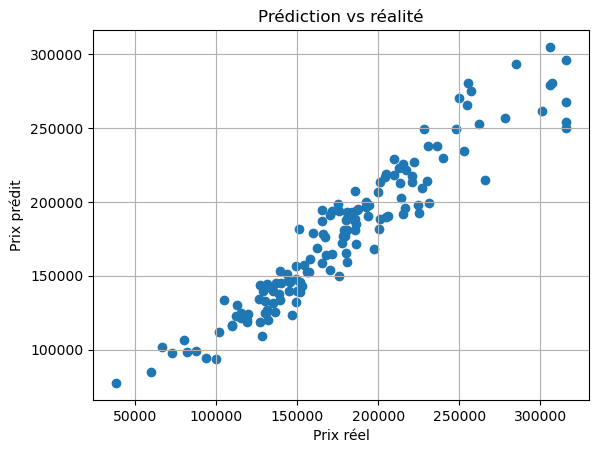

In [133]:
plt.scatter(y_test,y_pred,alpha=1)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Prédiction vs réalité")
plt.grid()
plt.show()

In [99]:
#Èvaluation du modéle
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("\n-- Èvaluation du modèle---")
print(f"MAE (erreur absolue moyenne) :{mae:.2f}")#2f deux chiffres aprés la virgule
print(f"MSE (erreur quadratique moyenne) :{mse:.2f}")
print(f"RMSE (erreur absolue moyenne) :{rmse:.2f}")


-- Èvaluation du modèle---
MAE (erreur absolue moyenne) :15248.22
MSE (erreur quadratique moyenne) :522591425.87
RMSE (erreur absolue moyenne) :22860.26


Métriques rapportées :

MAE (Mean Absolute Error - Erreur Absolue Moyenne) : 15 248,22
Cela signifie qu'en moyenne, les prédictions du modèle s'écartent de 15 248 unités (en valeur absolue) des valeurs réelles.

MSE (Mean Squared Error - Erreur Quadratique Moyenne) : 522 591 425,87
Moyenne des carrés des erreurs. Cette métrique pénalise fortement les grandes erreurs (du fait du carré).

RMSE (Root Mean Squared Error - Racine de l'Erreur Quadratique Moyenne) : 22 860,26
Racine carrée du MSE, ce qui la rend interprétable dans les mêmes unités que la variable cible et que le MAE.

In [100]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [102]:
#Standardisation des données #PAS DE ENTRAINEMENT

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [103]:
ridge_model=Ridge(alpha=1.0)#alpha est le parametre dede régularisation,permet de pénaliser les coefficients trop grand pour rendre le modéle plus simple et plus stable
ridge_model.fit(X_scaled,y)

Ridge()

In [104]:
#Prédiction

y_pred_ridger=ridge_model.predict(X_scaled)

In [105]:
#Evaluation

mae_ridge=mean_absolute_error(y,y_pred_ridger)
rmse_ridge=np.sqrt(mean_squared_error(y,y_pred_ridger))

print(f"MAE :{mae_ridge: .2f}")
print(f"RMSE :{rmse_ridge: .2f}")

MAE : 8195.42
RMSE : 11240.60


Interprétation des nouvelles valeurs

MAE ≈ 8 195 : En moyenne, les prédictions s'écartent de environ 8 200 unités des valeurs réelles.

RMSE ≈ 11 241 : Les erreurs plus importantes sont moins pénalisées qu'avant, mais restent présentes.

In [134]:
from sklearn.linear_model import Lasso

In [107]:
#Regression Lasso

lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_scaled,y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+10, tolerance: 2.116e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [108]:
y_pred_lasso=lasso_model.predict(X_scaled)

In [114]:
#Evaluation

mae_lasso=mean_absolute_error(y,y_pred_lasso)
rmse_lasso=np.sqrt(mean_squared_error(y,y_pred_lasso))

print(f"MAE :{mae_lasso: .2f}")
print(f"RMSE :{rmse_lasso: .2f}")

MAE : 8196.09
RMSE : 11232.28


Interprétation globale (rappel et confirmation)

MAE ≈ 8 196 : Erreur moyenne absolue d'environ 8 200 unités.

RMSE ≈ 11 232 : Les erreurs plus importantes restent bien contrôlées.

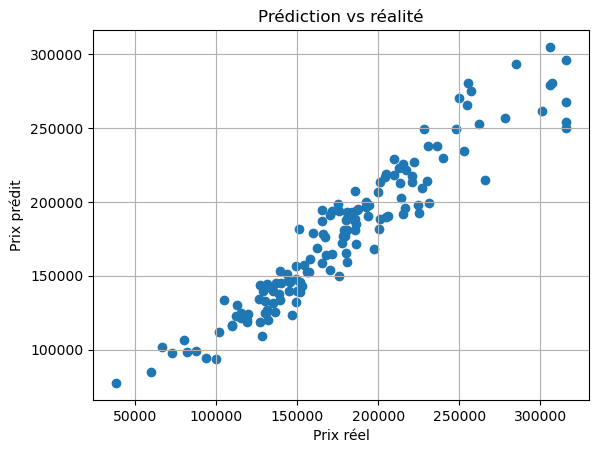

In [130]:
plt.scatter(y_test,y_pred,alpha=1)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Prédiction vs réalité")
plt.grid()
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [123]:
from xgboost import XGBRegressor

params = {'objective': 'reg:linear',
          'max_depth': 4,
          'alpha': 1,
          'learning_rate': 0.1,
          'n_estimators': 90
          }
xgb_reg = XGBRegressor(**params)
xgb_reg.fit(X_train, y_train)
     

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:45:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=90,
             n_jobs=None, ...)

In [128]:
y_pred = xgb_reg.predict(X_test)
mae_XGBRegressor=mean_absolute_error(y_test, y_pred)
print(f"MAE :{mae_XGBRegressor: .2f}")

MAE : 13378.11


In [129]:
y_pred_train = xgb_reg.predict(X_train)
mae_XGBRegressor=mean_absolute_error(y_train, y_pred_train)
print(f"MAE :{mae_XGBRegressor: .2f}")

MAE : 4761.39


# Conclusion

Parmi tous les modèles testés (LinearRegression, Ridge, Lasso, XGBRegressor), 

Lasso est légèrement le meilleur en performance globale pour votre tâche de régression multi-output (prédiction simultanée de X et Y).

Métriques clés de Lasso :

MAE : 8 196,09 (erreur moyenne absolue)

RMSE : 11 232,28 (erreur quadratique moyenne racine)
En résumé : Lasso offre la précision la plus stable et la plus basse erreur globale.

C’est actuellement le choix optimal pour votre modèle.